# Visualisation
# Course Work 1 - FFT, Filtering and Spectrograms

# Tutorial Section

In [1]:
# Here, we import all packages we need.

# This is a package for handling and manipulating data.
import pandas as pd

# This is the standard package for plotting.
from matplotlib import pyplot as plt 

# Seaborn is build on matplotlib.
# It is more comfortable to use than pure matplotlib.
import seaborn as sns

# Numpy helps us handling arrays of numbers
import numpy as np

# We use this function to calculate the fft
from numpy.fft import fft, ifft

# This shifts the output of the fft so that zero frequency is at the centre
from numpy.fft import fftshift

# The inverse of fftshift 
from numpy.fft import ifftshift

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

from scipy import signal

from scipy.io import wavfile

import IPython.display as ipd

# Inverse FFT
We have so far only looked at the FFT, but not at its inverse that takes us from the frequency domain back to the time domain.  


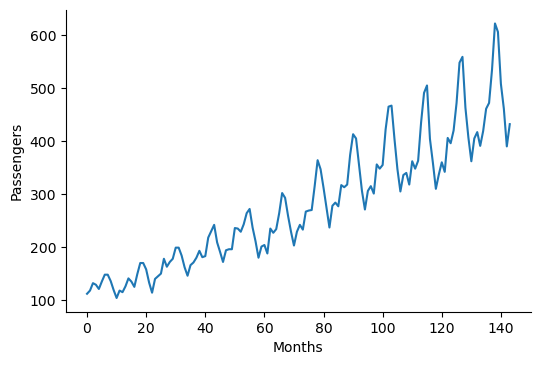

In [2]:
# We will start again with the flight dataset
flights = sns.load_dataset("flights")
passengers = np.array(flights['passengers'])
months = np.arange(passengers.size) 
sns.lineplot(x=months, y=passengers)
plt.xlabel('Months')
plt.ylabel('Passengers')
sns.despine()

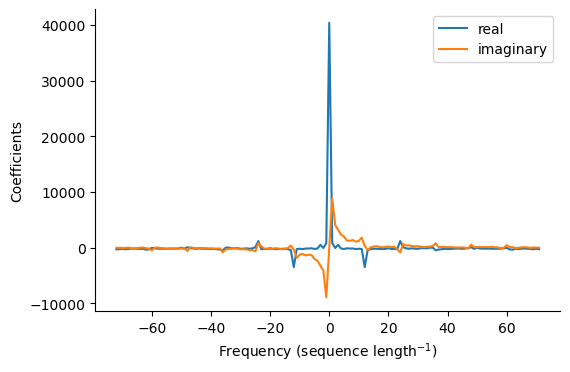

In [3]:
# We apply the FFT
passengersFFT = fftshift(fft(passengers))

# We will use this as x-axis to plot our coefficients against
freqs = np.arange(passengers.size)

# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (passengers.size)//2

# Lets plot the results again
sns.lineplot(x=freqs, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqs, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now corresponds to the frequency as repetitions per sequence length
plt.xlabel('Frequency (sequence length$^{-1}$)')
plt.legend()
sns.despine()
plt.show()


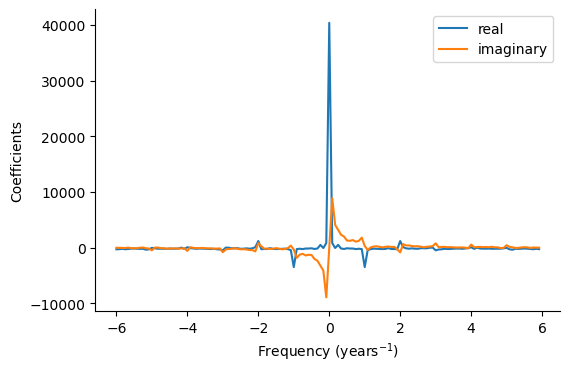

In [4]:
# We have 12 years in the time series.
freqsYears = freqs/12.0

# Lets plot the results again
sns.lineplot(x=freqsYears, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqsYears, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency (years$^{-1}$)')
plt.legend()
sns.despine()

Let's now apply the inverse FFT.

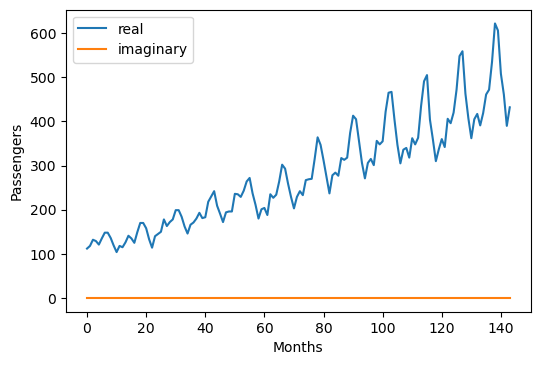

In [5]:
# we have to first apply the inverse fftshift
passengersFFT_shotfBack = ifftshift(passengersFFT)

# now we apply the inverse FFT
passangers_reconstructed = ifft(passengersFFT_shotfBack)

# lets look at the result
# Note that the result is complex.
plt.plot(passangers_reconstructed.real, label ='real')
plt.plot(passangers_reconstructed.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.show()

# We only need the real part
# The imaginary part is zero (up to numerical accuracy)
passangers_reconstructed = passangers_reconstructed.real 

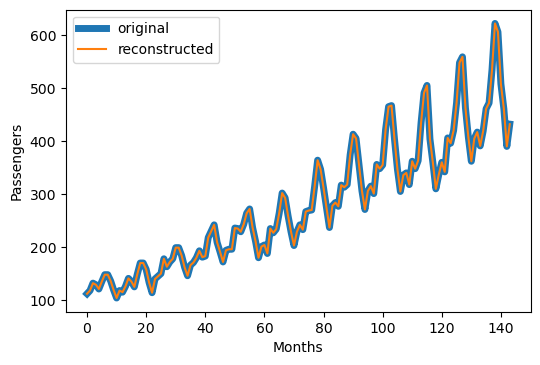

In [6]:
# The our reconstrutcion is identical to the original
plt.plot(flights['passengers'], label ='original', linewidth = 5)
plt.plot(passangers_reconstructed, label = 'reconstructed')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.show()

## Filtering in Frequency Space
Here we will apply a filter, before we reconstruct the signal.
This way, we can amplify or remove frequencies.
Before we build a filter, we will make a plot of the spectrum.

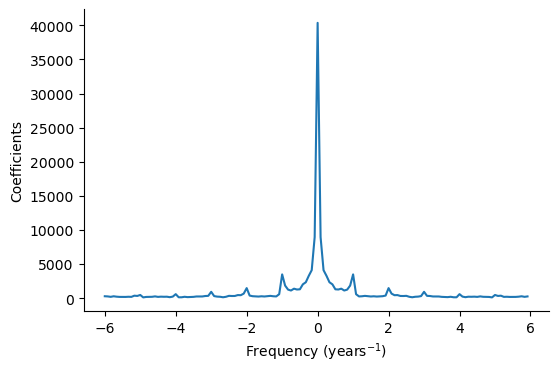

In [7]:
# We apply the FFT
passengersFFT = fftshift(fft(passengers))

# We will use this as x-axis to plot our coefficients against
freqs = np.arange(passengers.size)

# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (passengers.size)//2

# We have 12 years in the time series.
freqsYears = freqs/12.0

# Lets plot the results again
sns.lineplot(x = freqsYears, y = np.abs(passengersFFT))
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency (years$^{-1}$)')
sns.despine()

Let's build a filter and plot the filter weights.

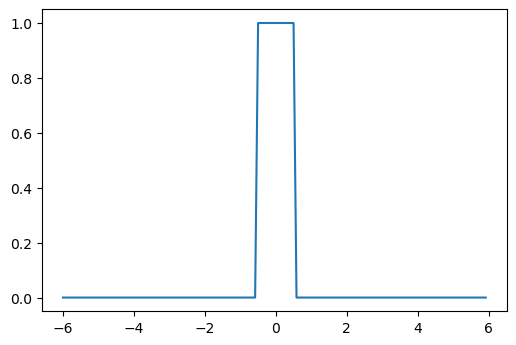

In [8]:
# We are building a brickwall filter that
# will remove all frequencies above 0.5 years^-1 
maxf = 0.5

# We start with an array of ones
weights = np.ones(len(freqsYears))

# This will set all the frequencies we want to keep to 0
weights[(freqsYears>maxf)] = 0.0

# We also have to consider the negative frequencies
weights[(freqsYears<-maxf)] = 0.0

# Let's plot the filter 
plt.plot(freqsYears, weights)

Let's now apply the filter.

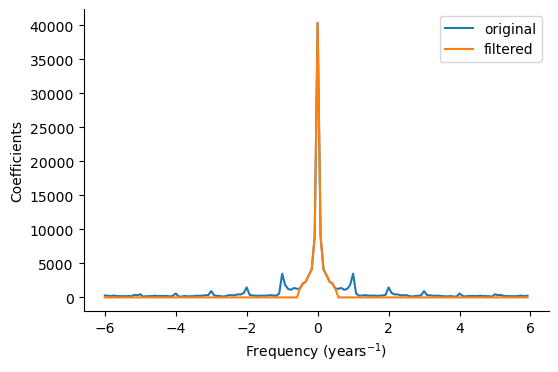

In [9]:
# We multiply the filter
passengersFFT_filtered = passengersFFT*weights

# Let's now look at the resulting spectrum
sns.lineplot(x = freqsYears, y = np.abs(passengersFFT), label = 'original')
sns.lineplot(x = freqsYears, y = np.abs(passengersFFT_filtered), label = 'filtered')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency (years$^{-1}$)')
sns.despine()
plt.legend()

Let's now look at the reconstructed filtered time series.

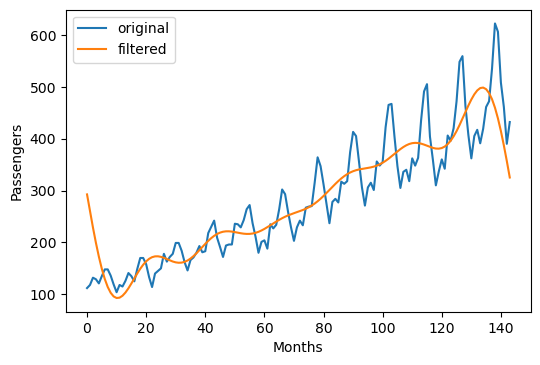

In [10]:
# we have to first apply the inverse fftshift
passengersFFT_shotfBack = ifftshift(passengersFFT_filtered)

# now we apply the inverse FFT
passangers_reconstructed = ifft(passengersFFT_shotfBack)

# We only need the real part
# The imaginary part is zero (up to numerical accuracy) // so we only take real part
passangers_reconstructed = passangers_reconstructed.real

# The our reconstrutcion is identical to the original
plt.plot(flights['passengers'], label ='original')
plt.plot(passangers_reconstructed, label = 'filtered')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.show()

## Loading Audio Samples


In [11]:
# we load the wav file
sample_rate, data = wavfile.read('./meadowlark_daniel-simion.wav')
# we get the sample rate (number of samples per second)
# and the data itself. It is stereo, i.e., has two channels.
print(sample_rate, data.shape)

# we use only one of the channels
data = data[:,0]

44100 (1792400, 2)


<ipython-input-11-28a173ed771e>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read('./meadowlark_daniel-simion.wav')


In [12]:
# Let's print some stats
number_of_samples = len(data)
length_in_seconds = len(data)/sample_rate
print("number of samples:", number_of_samples)
print("length is seconds:", length_in_seconds)
print("samples per second:", sample_rate)

# We can use this to play the file
ipd.Audio(data, rate = sample_rate ) # load a local WAV file

number of samples: 1792400
length is seconds: 40.64399092970522
samples per second: 44100


Text(0, 0.5, 'signal')

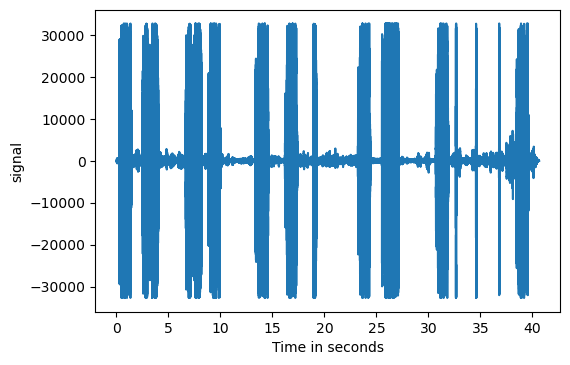

In [13]:
# Let's plot the signal
# To get the x-axis in seconds
x = np.arange(number_of_samples) / sample_rate
plt.plot(x, data)
plt.xlabel('Time in seconds')
plt.ylabel('signal')

## Spectrograms
We can create a spectrogram by using the spectrogram function provided by [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html).

<ipython-input-14-ce0dbd19ed7b>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log(Sxx))


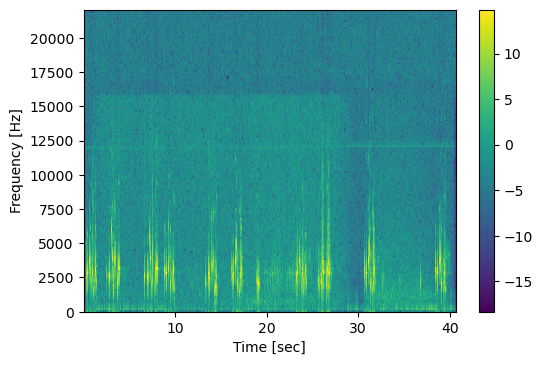

In [14]:
f, t, Sxx = signal.spectrogram(data, sample_rate)

# note that we use the logarithm before visualisation
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.colorbar()

plt.show()


Modifying the spectrogram:

<ipython-input-15-cb50ed746ddd>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = -5, vmax = 12)


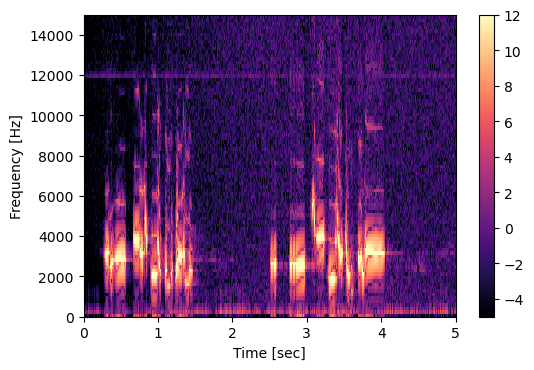

In [15]:
f, t, Sxx = signal.spectrogram(data, sample_rate)

# we can use a different colour map by setting cmap
# can choose the minimum and maximum by choosing vmin, vmax
plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = -5, vmax = 12)

# we can choose to look only at a limited region
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.ylim(0,15000)
plt.xlim(0,5)

plt.colorbar()

plt.show()

# Exercises

# Exercise 1 (2 marks)
Load the file './Jungle-SoundBible.com-1211567897.wav' you can disregard one of the channels.
Print the number of samples, the length of the file in seconds, and the sample rate.
Listen to the file and and plot the **time series**, **the spectrum**, and **the spectrogram**. 
Make sure that the axes are labeled in a sensible way.

In [16]:
# Loading the wav file
sample_rate, data = wavfile.read('./Jungle-SoundBible.com-1211567897.wav')
# Disregarding one of the samples
data = data[:,0]

In [17]:
# Let's print some stats
number_of_samples = len(data)
length_in_seconds = len(data)/sample_rate
print("number of samples:", number_of_samples)
print("length is seconds:", length_in_seconds)
print("samples per second:", sample_rate)

# We can use this to play the file
ipd.Audio(data, rate = sample_rate ) # load a local WAV file

number of samples: 119808
length is seconds: 5.433469387755102
samples per second: 22050


Text(0, 0.5, 'signal')

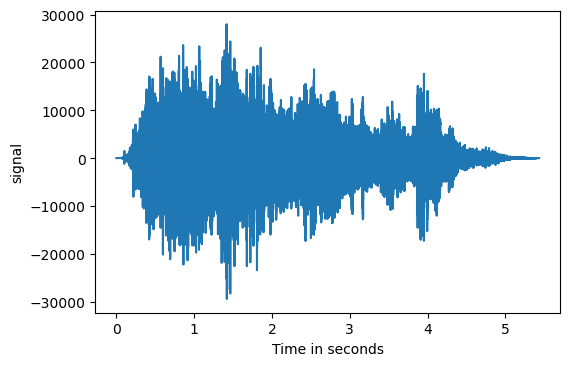

In [18]:
# Plotting the time series
# To get the x-axis in seconds
x = np.arange(number_of_samples) / sample_rate
plt.plot(x, data)
plt.xlabel('Time in seconds')
plt.ylabel('signal')

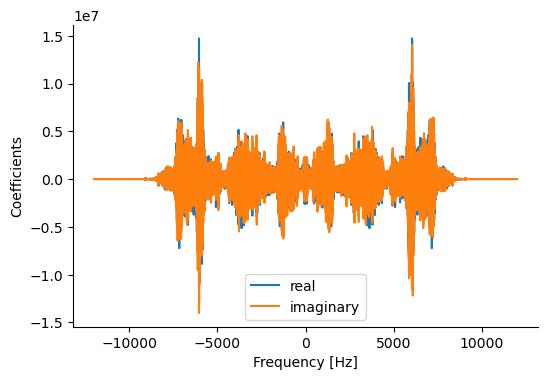

In [19]:
# Checking if the time series above has an imaginary part:

# We apply the FFT
dataFFT = fftshift(fft(data))

# We will use this as x-axis to plot our coefficients against
freqs = np.arange(data.size)

# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (data.size)//2
# Since we have 5 seconds in the time series
freqs = freqs/5.0
# Lets plot the results again
sns.lineplot(x=freqs, y=dataFFT.real, label = 'real')
sns.lineplot(x=freqs, y=dataFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now corresponds to the frequency as repetitions per sequence length
plt.xlabel('Frequency [Hz]')
plt.legend()
sns.despine()
plt.show()


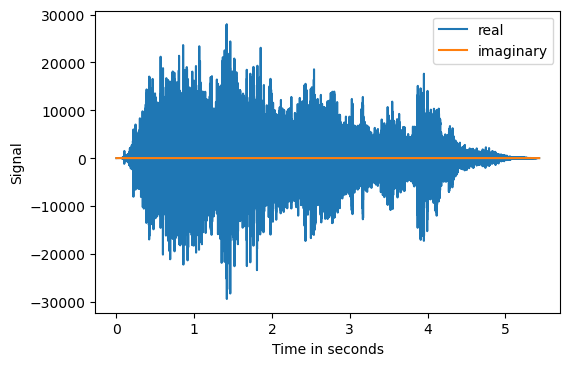

In [20]:
# Applying inverse fftshift
dataFFT_shiftBack = ifftshift(dataFFT)

# now we apply the inverse FFT
data_reconstructed = ifft(dataFFT_shiftBack)
x = np.arange(number_of_samples) / sample_rate

plt.plot(x, data_reconstructed.real, label ='real')
plt.plot(x, data_reconstructed.imag, label = 'imaginary')
plt.legend()
plt.xlabel('Time in seconds')
plt.ylabel('Signal')
plt.show()

 From this we can see that there is no imaginary part.

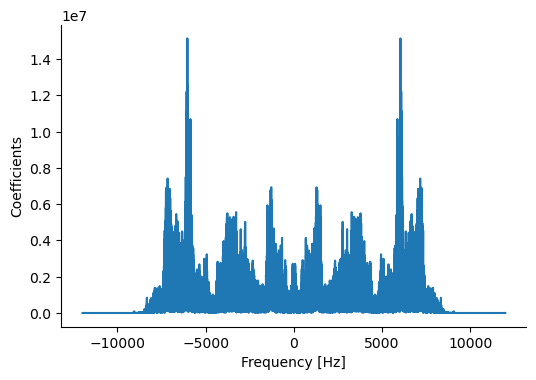

In [21]:
# Plotting the Spectrum
# We apply the FFT
dataFFT = fftshift(fft(data))

# We will use this as x-axis to plot our coefficients against
freqs = np.arange(data.size)

# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (data.size)//2

# We have 5 seconds in the time series.
freqsYears = freqs/5.0

# Lets plot the results again
sns.lineplot(x = freqsYears, y = np.abs(dataFFT))
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency [Hz]')
sns.despine()

<ipython-input-22-b2ff45d3330a>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log(Sxx))


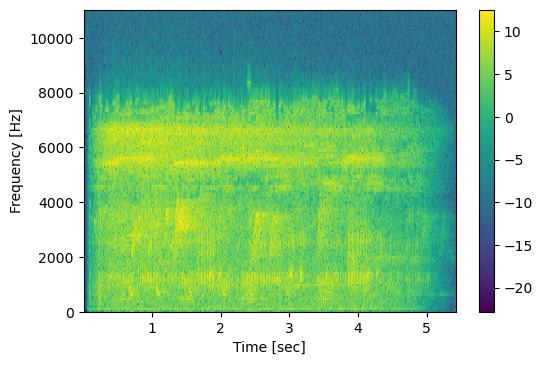

In [22]:
# Plotting the Spectrogram
f, t, Sxx = signal.spectrogram(data, sample_rate)

# note that we use the logarithm before visualisation
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.colorbar()

plt.show()


<ipython-input-23-0ff8dd5b3f84>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = -2, vmax = 15)


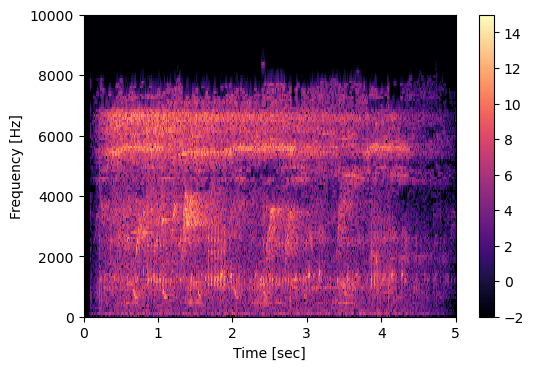

In [23]:
# Modifying the Spectrogram :
f, t, Sxx = signal.spectrogram(data, sample_rate)

# we can use a different colour map by setting cmap
# can choose the minimum and maximum by choosing vmin, vmax
plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = -2, vmax = 15)

# we can choose to look only at a limited region
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.ylim(0,10000)
plt.xlim(0,5)

plt.colorbar()

plt.show()

# Exercise 2 (6 marks)
The audio file contains sounds produced by different animals.
Try to identify which parts of the spectrum belong to different animals.
Design 3 different filters that each isolate the sound produced by 3 types of animal.
Each filter should roughly conserve only the frequency range of one animal type and remove all other frequencies above and below that range.
It can help to use 'plt.xlim' and 'plt.ylim' to zoom in on different parts of the spectrogram and find the correct parts of the spectrum.
It can also be very useful to change 'vmin' and 'vmax' to find the animals.

After filtering the signal, listen to the results to make sure that you have roughly isolated the animal.
Finally, **make one spectrogram for each filtered signal**.


(1000.0, 7000.0)

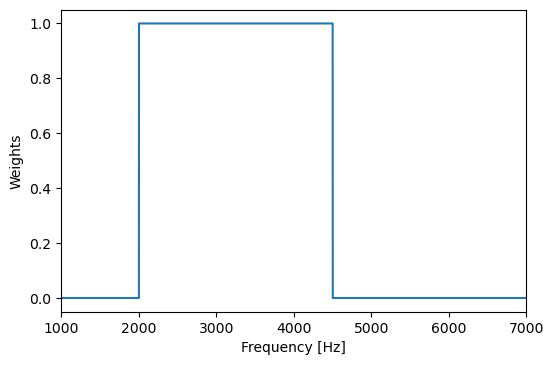

In [24]:
# There are 3 animals so we will build 3 filters to extract the sounds of each of the animals

# Filter 1
# will remove all frequencies between 2000 and 4500 Hz
maxf = 4500
minf = 2000
# We start with an array of ones
weights = np.ones(len(freqsYears))

# This will set all the frequencies we want to keep to 0
weights[(freqsYears>maxf)] = 0.0

# We also have to consider the negative frequencies
weights[(freqsYears<minf)] = 0.0

# Let's plot the filter 
plt.plot(freqsYears, weights)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Weights')
plt.xlim(1000,7000)

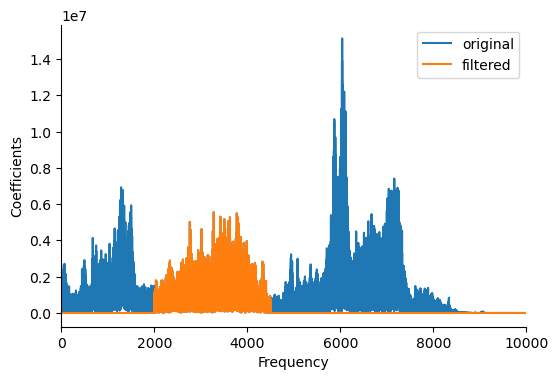

In [25]:
# We multiply the filter
dataFFT_filtered = dataFFT*weights

# Let's now look at the resulting spectrum
sns.lineplot(x = freqsYears, y = np.abs(dataFFT), label = 'original')
sns.lineplot(x = freqsYears, y = np.abs(dataFFT_filtered), label = 'filtered')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency')
plt.xlim(0,10000)
sns.despine()
plt.legend()

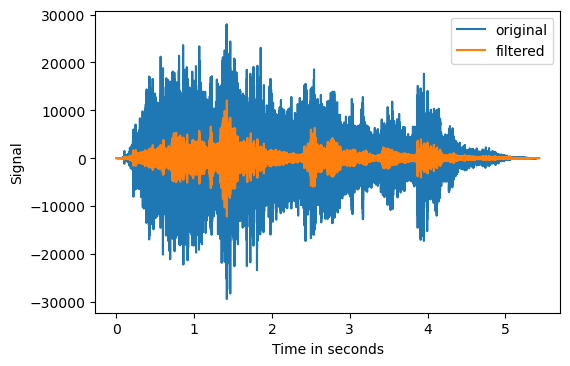

In [26]:
# Reconstructing the Signal : 
# we have to first apply the inverse fftshift
dataFFT_shiftBack = ifftshift(dataFFT_filtered)

# now we apply the inverse FFT
data_reconstructed1 = ifft(dataFFT_shiftBack)

# We only need the real part
# The imaginary part is zero (up to numerical accuracy)
data_reconstructed1 = data_reconstructed1.real

# The our reconstrutcion is identical to the original
x = np.arange(number_of_samples) / sample_rate
plt.plot(x, data, label ='original')
plt.plot(x, data_reconstructed1, label = 'filtered')
plt.legend()
plt.xlabel('Time in seconds')
plt.ylabel('Signal')
plt.show()

In [27]:
ipd.Audio(data_reconstructed1, rate = sample_rate) # load a local WAV file

This is the sound of the first animal.

<ipython-input-28-842053104c9d>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = 0, vmax = 15)


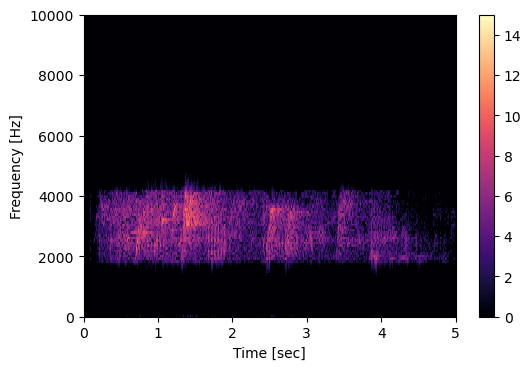

In [28]:
# Plotting the Spectogram:
f, t, Sxx = signal.spectrogram(data_reconstructed1, sample_rate)

# we can use a different colour map by setting cmap
# can choose the minimum and maximum by choosing vmin, vmax
plt.pcolormesh(t, f, np.log(Sxx), cmap = 'magma', vmin = 0, vmax = 15)

# we can choose to look only at a limited region
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.xlim(0,5)
plt.ylim(0,10000)
plt.colorbar()

plt.show()

(0.0, 1500.0)

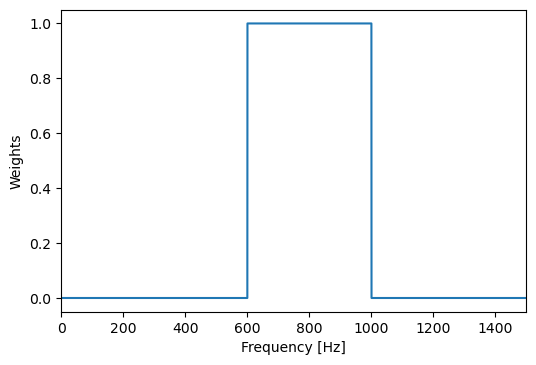

In [29]:
# Building the second filter

# Filter 2
# will remove all frequencies between 600 and 1000 Hz
maxf = 1000
minf = 600
# We start with an array of ones
weights = np.ones(len(freqsYears))

# This will set all the frequencies we want to keep to 0
weights[(freqsYears>maxf)] = 0.0

# We also have to consider the negative frequencies
weights[(freqsYears<minf)] = 0.0

# Let's plot the filter 
plt.plot(freqsYears, weights)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Weights')
plt.xlim(0,1500)

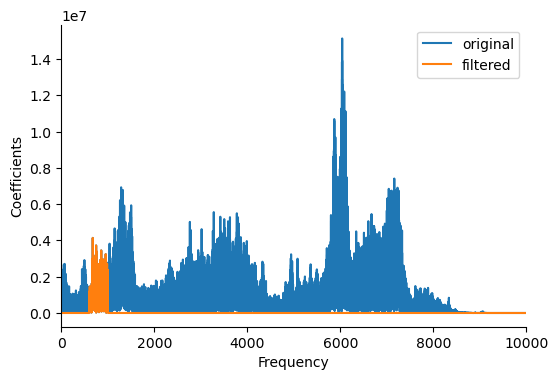

In [30]:
# We multiply the filter
dataFFT_filtered = dataFFT*weights

# Let's now look at the resulting spectrum
sns.lineplot(x = freqsYears, y = np.abs(dataFFT), label = 'original')
sns.lineplot(x = freqsYears, y = np.abs(dataFFT_filtered), label = 'filtered')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency')
plt.xlim(0,10000)
sns.despine()
plt.legend()

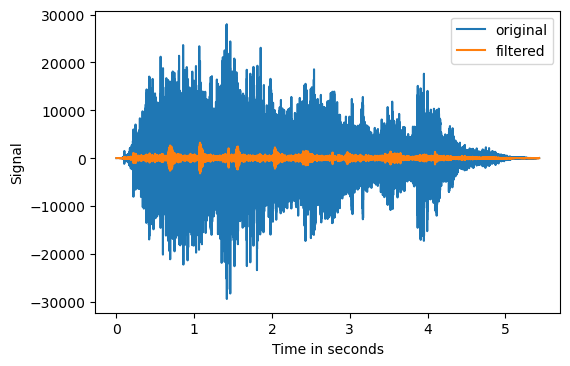

In [31]:
# Reconstructing the Signal : 
# we have to first apply the inverse fftshift
dataFFT_shiftBack = ifftshift(dataFFT_filtered)

# now we apply the inverse FFT
data_reconstructed2 = ifft(dataFFT_shiftBack)

# We only need the real part
# The imaginary part is zero (up to numerical accuracy)
data_reconstructed2 = data_reconstructed2.real

# The our reconstrutcion is identical to the original
x = np.arange(number_of_samples) / sample_rate
plt.plot(x, data, label ='original')
plt.plot(x, data_reconstructed2, label = 'filtered')
plt.legend()
plt.xlabel('Time in seconds')
plt.ylabel('Signal')
plt.show()

In [32]:
ipd.Audio(data_reconstructed2, rate = sample_rate) # load a local WAV file

This is the sound of the second animal.

<ipython-input-33-a2ecdaa2929a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log(Sxx), cmap = 'Reds', vmin = 0, vmax = 9)


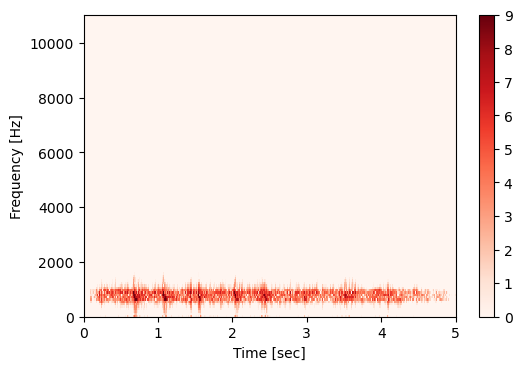

In [33]:
# Plotting the Spectogram:
f, t, Sxx = signal.spectrogram(data_reconstructed2, sample_rate)

# we can use a different colour map by setting cmap
# can choose the minimum and maximum by choosing vmin, vmax
plt.pcolormesh(t, f, np.log(Sxx), cmap = 'Reds', vmin = 0, vmax = 9)

# we can choose to look only at a limited region
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.xlim(0,5)
#plt.ylim(-3000,0)
plt.colorbar()

plt.show()

(0.0, 4000.0)

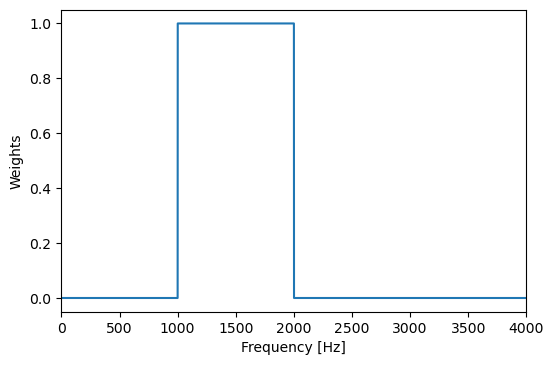

In [34]:
# Building the third filter

# Filter 3
# will remove all frequencies between 1000 and 2000 Hz
maxf = 2000
minf = 1000
# We start with an array of ones
weights = np.ones(len(freqsYears))

# This will set all the frequencies we want to keep to 0
weights[(freqsYears>maxf)] = 0.0

# We also have to consider the negative frequencies
weights[(freqsYears<minf)] = 0.0

# Let's plot the filter 
plt.plot(freqsYears, weights)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Weights')
plt.xlim(0,4000)

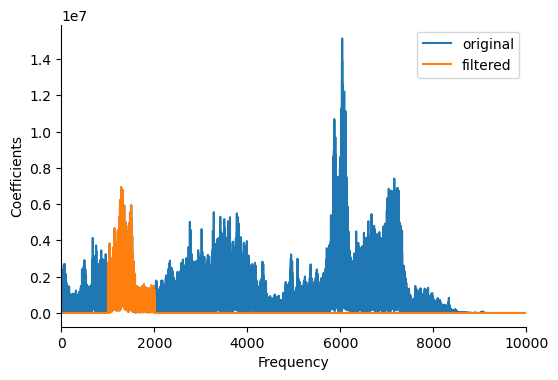

In [35]:
# We multiply the filter
dataFFT_filtered = dataFFT*weights

# Let's now look at the resulting spectrum
sns.lineplot(x = freqsYears, y = np.abs(dataFFT), label = 'original')
sns.lineplot(x = freqsYears, y = np.abs(dataFFT_filtered), label = 'filtered')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency')
plt.xlim(0,10000)
sns.despine()
plt.legend()

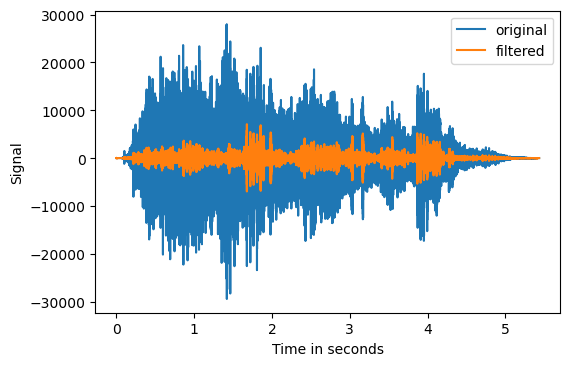

In [36]:
# Reconstructing the Signal : 
# we have to first apply the inverse fftshift
dataFFT_shiftBack = ifftshift(dataFFT_filtered)

# now we apply the inverse FFT
data_reconstructed3 = ifft(dataFFT_shiftBack)

# We only need the real part
# The imaginary part is zero (up to numerical accuracy)
data_reconstructed3 = data_reconstructed3.real

# The our reconstrutcion is identical to the original
x = np.arange(number_of_samples) / sample_rate
plt.plot(x, data, label ='original')
plt.plot(x, data_reconstructed3, label = 'filtered')
plt.legend()
plt.xlabel('Time in seconds')
plt.ylabel('Signal')
plt.show()

In [37]:
ipd.Audio(data_reconstructed3, rate = sample_rate) # load a local WAV file

This is the sound of the third animal.

<ipython-input-38-c31aaae981c7>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log(Sxx), cmap = 'Reds', vmin = 0, vmax = 10)


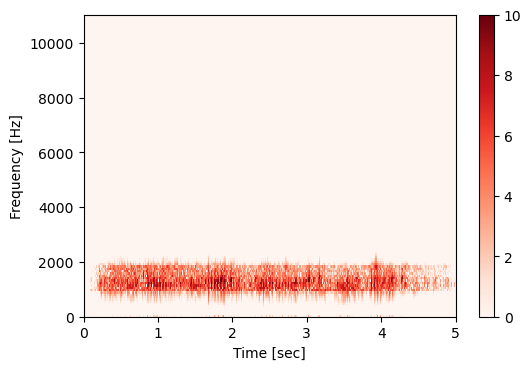

In [38]:
# Plotting the Spectogram:
f, t, Sxx = signal.spectrogram(data_reconstructed3, sample_rate)

# we can use a different colour map by setting cmap
# can choose the minimum and maximum by choosing vmin, vmax
plt.pcolormesh(t, f, np.log(Sxx), cmap = 'Reds', vmin = 0, vmax = 10)

# we can choose to look only at a limited region
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.xlim(0,5)
#plt.ylim(-8000,0)
plt.colorbar()

plt.show()

## Exercise 3 (2 marks)
So far we have used only filter that set the weight to 0 and 1 for frequencies that should be removed or retained.
Create a filter for one of the animals that transitions more smoothly between areas of the spectrum that are removed and that are retained.
Plot the **filter weights** and make a **spectrogram after filtering**.

We can create a smoothed version of the box filter by convolving a box filter with itself multiple times.

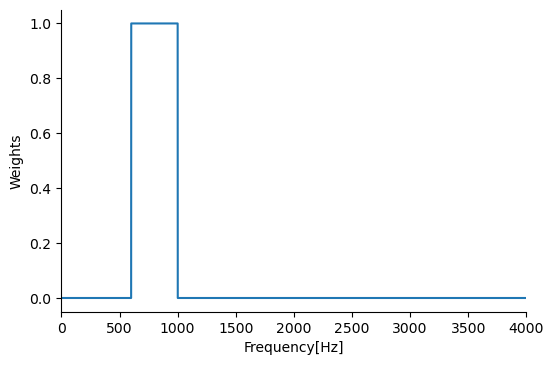

(array([62904, 62905, 62906, ..., 64902, 64903, 64904]),)

In [39]:
# Filter 2
# will remove all frequencies between 600 and 1000 Hz
maxf = 1000
minf = 600
# We start with an array of ones
weights = np.ones(len(freqsYears))

# This will set all the frequencies we want to keep to 0
weights[(freqsYears>(maxf))] = 0.0

# We also have to consider the negative frequencies
weights[(freqsYears<(minf))] = 0.0
# Let's plot the filter 
plt.plot(freqsYears, weights)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Weights')
plt.xlim(0,4000)
sns.despine()
plt.show()
np.where(weights == 1) 

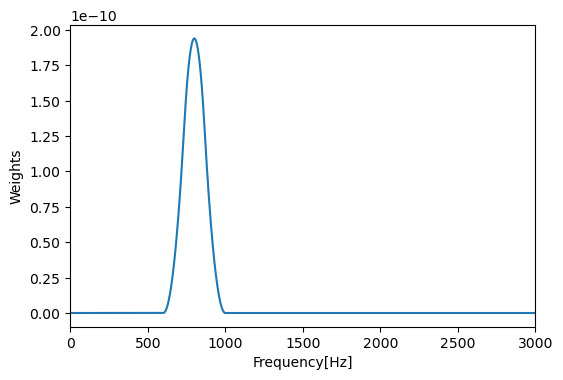

In [40]:
# Plotting a smooth version of the above signal:
maxf = 1000
minf = 600
# We start with an array of ones
weights = np.ones(len(freqsYears))

# This will set all the frequencies we want to keep to 0
weights[(freqsYears>(maxf/3))] = 0.0

# We also have to consider the negative frequencies
weights[(freqsYears<(minf/3))] = 0.0
#print(len(weights))
weights = weights/len(weights)
Smoothed_version = np.convolve(weights,weights, 'same')
Smoothed_version2 = np.convolve(Smoothed_version,weights, 'same')

plt.plot(freqsYears, Smoothed_version2)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Weights')
plt.xlim(0,3000)
plt.show()



In [41]:
# Filtering:
dataFFT_filtered = dataFFT*Smoothed_version2

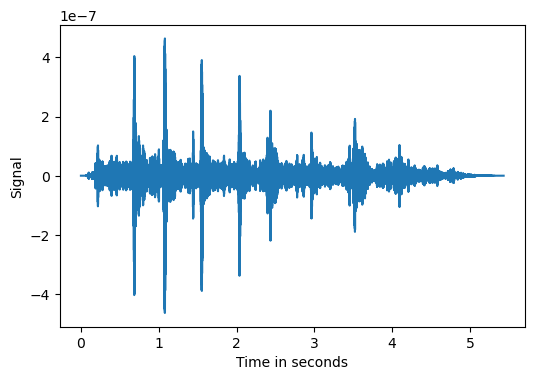

In [42]:
# Reconstructing the Signal : 
# we have to first apply the inverse fftshift
dataFFT_shiftBack = ifftshift(dataFFT_filtered)

# now we apply the inverse FFT
data_reconstructed4 = ifft(dataFFT_shiftBack)

# We only need the real part
# The imaginary part is zero (up to numerical accuracy)
data_reconstructed4 = data_reconstructed4.real

# The our reconstrutcion is identical to the original
x = np.arange(number_of_samples) / sample_rate
plt.plot(x, data_reconstructed4)
plt.xlabel('Time in seconds')
plt.ylabel('Signal')
plt.show()

<ipython-input-43-df3688f5ca70>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log(Sxx), cmap = 'Reds', vmin = -75, vmax = -40)


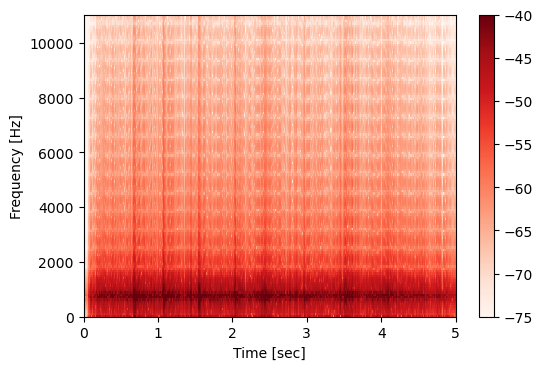

In [43]:
# Plotting the Spectrogram :
f, t, Sxx = signal.spectrogram(data_reconstructed4, sample_rate)

# we can use a different colour map by setting cmap
# can choose the minimum and maximum by choosing vmin, vmax
plt.pcolormesh(t, f, np.log(Sxx), cmap = 'Reds', vmin = -75, vmax = -40)

# we can choose to look only at a limited region
plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.xlim(0,5)

plt.colorbar()

plt.show()

In [44]:
ipd.Audio(data_reconstructed4, rate = sample_rate) # load a local WAV file